<a href="https://colab.research.google.com/github/gukouk176-debug/colab2/blob/main/DataScience_12_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第12回講義 評価とチューニング
### 1.パイパーパラメータ探索法
+ Grid search
+ Random search
+ Validation curves（検証曲線）

### 2. 評価手法
+ 評価方法の基礎


## 全講義共通初期設定
+ 警告の非表示(実装時は非推奨)
+ numpy pandas小数点以下桁数の表示設定
+ pandas全データ表示設定
+ Google driveへの接続

In [22]:
# ワーニングを非表示にする
# この設定は不都合が見えなくなる為、お勧めしない
# 今回は教育資料用に、出力を簡素化する為に利用する
import warnings
warnings.simplefilter('ignore')

# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 小数点以下桁数の表示設定
np.set_printoptions(precision = 3)
pd.options.display.precision = 3

# pandasの全データ表示設定
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#google driveに接続
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [23]:
#google driveと接続できたかを確認
!ls drive/MyDrive/DataScience

'3(00000).txt'	'3(00004).txt'		       iris.csv		   ファイル_000
'3(00001).txt'	 breast-cancer-wisconsin.csv   titanic_train.csv
'3(00002).txt'	 example.xlsx		      'wine 2.csv'
'3(00003).txt'	 imports-85.csv		       wine.csv


# 1.パイパーパラメータ探索法

## グリッドサーチ

### アヤメデータの準備

In [24]:
#グリッドサーチによるハイパーパラメータの探索
#アヤメのデータに決定木モデルを適用する
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree

#ライブラリpandasを使ったcsvデータの読み込み,sepで区切り記号を設定
ayame_df = pd.read_csv("/content/drive/MyDrive/DataScience/iris.csv", sep=",")

#説明変数、目的変数の設定
X = ayame_df.drop('species', axis =1)
y = ayame_df['species']

print(X.head())
print(y.head())

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: species, dtype: object


In [25]:
#テストデータとトレーニングデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None )

#説明変数の標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### グリッドサーチ

In [26]:
#グリッドサーチの組み合わせに用いるパラメータ値の設定
param = {'max_depth':[1, 2, 3, 10, 25],
         'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7],
         'min_samples_split':[2, 3, 5, 6]}

#決定木モデルの生成と学習
tree_gs = GridSearchCV(tree.DecisionTreeClassifier(),   # グリッドサーチで決定木を定義
                   param,                           # パラメータの設定
                   cv=5)

tree_gs.fit(X_train_std,y_train)

# スコアとパラメータの組み合わせ
scores = tree_gs.cv_results_['mean_test_score']
params = tree_gs.cv_results_['params']

#全ての組み合わせにおける精度の確認
for i in range(len(scores)):
    print(scores[i], params[i])

print()

# 結果の確認
print('結果の確認')
best_tree_gs = tree_gs.best_estimator_
print('最適なパラメータ:   ', tree_gs.best_params_)
print('トレーニング結果:   {:.3f}'.format(best_tree_gs.score(X_train_std, y_train)))
print('テスト結果:         {:.3f}'.format(best_tree_gs.score(X_test_std, y_test)))

0.7 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.7 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.7 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.7 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.7 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.7 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.7 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.7 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.7 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.7 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 6}
0.7 {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.7 {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 3}
0.7 {'max_depth': 1, 'min_samples_leaf': 4, 'min

In [27]:
# 検証結果の確認
pd.DataFrame(tree_gs.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
mean_fit_time,0.002,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.003,0.002,0.002,0.003,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
std_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.001,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.021,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
std_score_time,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_max_depth,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
param_min_samples_leaf,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7
param_min_samples_

### 演習１

In [28]:
#演習１：これまで使ってきたデータセットとモデルに対してグリッドサーチを行う（どのデータセット、モデルでもよい）
#グリッドサーチの組み合わせに用いるパラメータ値の設定
param = {'max_depth':[1, 5, 10, 15, 20],
         'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7],
         'min_samples_split':[2, 4, 8, 10]}

#決定木モデルの生成と学習
tree_gs = GridSearchCV(tree.DecisionTreeClassifier(),   # グリッドサーチで決定木を定義
                   param,                           # パラメータの設定
                   cv=5)

tree_gs.fit(X_train_std,y_train)

# スコアとパラメータの組み合わせ
scores = tree_gs.cv_results_['mean_test_score']
params = tree_gs.cv_results_['params']

#全ての組み合わせにおける精度の確認
for i in range(len(scores)):
    print(scores[i], params[i])

print()

# 結果の確認
print('結果の確認')
best_tree_gs = tree_gs.best_estimator_
print('最適なパラメータ:   ', tree_gs.best_params_)
print('トレーニング結果:   {:.3f}'.format(best_tree_gs.score(X_train_std, y_train)))
print('テスト結果:         {:.3f}'.format(best_tree_gs.score(X_test_std, y_test)))
pd.DataFrame(tree_gs.cv_results_).T









0.7 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.7 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 8}
0.7 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.7 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.7 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.7 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.7 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.7 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 4}
0.7 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.7 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.7 {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.7 {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4}
0.7 {'max_depth': 1, 'min_samples_leaf': 4, '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
mean_fit_time,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.001,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
std_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_max_depth,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
param_min_samples_leaf,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7
param_

## ランダムサーチ

In [29]:
#ランダムサーチによるハイパーパラメータ探索
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, None],                  #distribution
              "max_features": sp_randint(1, 3),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "criterion": ["gini", "entropy"]}

tree_rs = RandomizedSearchCV(tree.DecisionTreeClassifier(),param_dist, cv=5)
tree_rs.fit(X_train,y_train)

# スコアとパラメータの組み合わせ
scores = tree_rs.cv_results_['mean_test_score']
params = tree_rs.cv_results_['params']

#全ての組み合わせにおける精度の確認
for i in range(len(scores)):
    print(scores[i], params[i])

print()

# 結果の確認
print('結果の確認')
best_tree_rs = tree_rs.best_estimator_
print('最適なパラメータ:   ', tree_rs.best_params_)
print('トレーニング結果:   {:.3f}'.format(best_tree_rs.score(X_train_std, y_train)))
print('テスト結果:         {:.3f}'.format(best_tree_rs.score(X_test_std, y_test)))

0.925 {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 7, 'min_samples_split': 10}
0.9166666666666667 {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 7}
0.8916666666666666 {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 7, 'min_samples_split': 2}
0.9083333333333334 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.9 {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.925 {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 7, 'min_samples_split': 5}
0.9416666666666668 {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 6, 'min_samples_split': 7}
0.8333333333333334 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 8}
0.925 {'criterion': 'entr

In [30]:
# 検証結果の確認（検証データに対しての順位によりソート）
pd.DataFrame(tree_rs.cv_results_).sort_values('rank_test_score').T

,6,0,5,8,1,3,4,2,9,7
mean_fit_time,0.003,0.003,0.004,0.002,0.002,0.002,0.002,0.002,0.002,0.003
std_fit_time,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.002,0.002,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002
std_score_time,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_criterion,entropy,entropy,gini,entropy,gini,entropy,entropy,gini,entropy,entropy
param_max_depth,None,None,None,None,3,3,None,None,3,3
param_max_features,1,2,1,2,2,2,1,1,1,1
param_min_samples_leaf,6,7,7,8,8,10,2,7,4,1
param_min_samples_split,7,10,5,7,7,2,8,2,4,8
params,"{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': 3, 'max_fea...","{'criterion': 'entropy', 'max_depth': 3, 'max_...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'entropy', 'max_depth': 3, 'max_...","{'criterion': 'entropy', 'max_depth': 3, 'max_..."


### 演習２

In [31]:
#演習２：これまで使ってきたデータセットとモデルに対してランダムサーチを行う（どのデータセット、モデルでもよい）

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [5, None],                  #distribution
              "max_features": sp_randint(1, 3),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(3, 11),
              "criterion": ["gini", "entropy"]}

tree_rs = RandomizedSearchCV(tree.DecisionTreeClassifier(),param_dist, cv=5)
tree_rs.fit(X_train,y_train)

# スコアとパラメータの組み合わせ
scores = tree_rs.cv_results_['mean_test_score']
params = tree_rs.cv_results_['params']

#全ての組み合わせにおける精度の確認
for i in range(len(scores)):
    print(scores[i], params[i])

print()

# 結果の確認
print('結果の確認')
best_tree_rs = tree_rs.best_estimator_
print('最適なパラメータ:   ', tree_rs.best_params_)
print('トレーニング結果:   {:.3f}'.format(best_tree_rs.score(X_train_std, y_train)))
print('テスト結果:         {:.3f}'.format(best_tree_rs.score(X_test_std, y_test)))

pd.DataFrame(tree_rs.cv_results_).sort_values('rank_test_score').T






0.9166666666666666 {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.9166666666666666 {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 7}
0.9416666666666667 {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_split': 8}
0.9166666666666666 {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 3}
0.8833333333333334 {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 3}
0.8833333333333334 {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 7}
0.8666666666666666 {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 9, 'min_samples_split': 4}
0.8666666666666666 {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_

,2,0,1,3,8,4,5,6,7,9
mean_fit_time,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.003,0.002
std_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_criterion,gini,entropy,gini,entropy,gini,entropy,gini,entropy,gini,entropy
param_max_depth,5,None,5,None,None,None,5,None,None,None
param_max_features,2,1,2,2,1,1,2,1,2,1
param_min_samples_leaf,6,3,4,4,10,4,4,9,6,10
param_min_samples_split,8,8,7,3,8,3,7,4,2,6
params,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': 5, 'max_fea...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': 5, 'max_fea...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'entropy', 'max_depth': None, 'm..."


## validation curve(検証曲線)

In [32]:
#データ処理したb乳がんデータセットを用いてSVMを実行．これに対してvalidation cruveを使う
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

#乳がんデータの読み込み
bc_source_df = pd.read_csv('/content/drive/MyDrive/DataScience/breast-cancer-wisconsin.csv',sep=',')

#前処理
bc_df = bc_source_df.replace("?", "5")
bc_df = bc_df.astype({'Bare Nuclei':'int64'})

#説明変数の設定
X = bc_df.iloc[:, [1,2,3,4,5,6,7,8,9]]

#目的変数の設定
y = bc_df.iloc[:,[10]]

#スコア算出
train_scores, valid_scores = validation_curve(SVC(C=1), X, y, param_name='gamma',
                                              param_range=np.linspace(0, 10, 9), cv=4)

#SVMによるトレーニングデータを用いた学習
print(train_scores)
print(valid_scores)

[[0.655 0.655 0.656 0.655]
 [1.    1.    1.    1.   ]
 [1.    1.    1.    1.   ]
 [1.    1.    1.    1.   ]
 [1.    1.    1.    1.   ]
 [1.    1.    1.    1.   ]
 [1.    1.    1.    1.   ]
 [1.    1.    1.    1.   ]
 [1.    1.    1.    1.   ]]
[[0.657 0.657 0.651 0.655]
 [0.834 0.811 0.857 0.914]
 [0.771 0.777 0.846 0.874]
 [0.731 0.76  0.771 0.655]
 [0.691 0.743 0.72  0.655]
 [0.691 0.72  0.703 0.655]
 [0.691 0.72  0.703 0.655]
 [0.691 0.72  0.703 0.655]
 [0.691 0.72  0.703 0.655]]


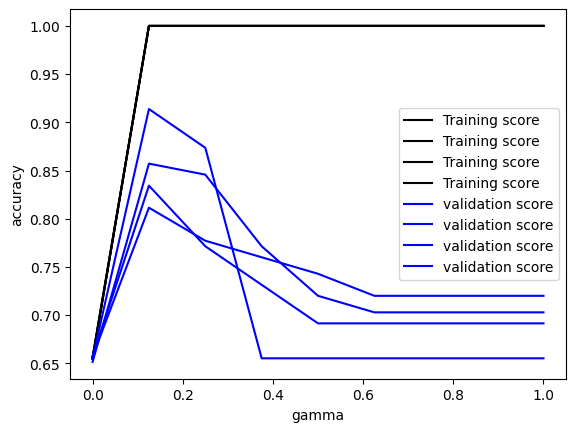

In [33]:
#validation curveの描画
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, 1, 9),train_scores,label="Training score",color="black")
plt.plot(np.linspace(0, 1, 9),valid_scores,label="validation score",color="blue")
plt.legend(loc="right")
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.show()

# 2.評価手法

##  評価方法の基礎 recallとprecision

In [36]:
#recallとprecisionを計算して表示
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
#recallのインポート
from sklearn.metrics import recall_score
#precisionのインポート
from sklearn.metrics import precision_score

#乳がんデータの読み込み
bc_source_df = pd.read_csv('/content/drive/MyDrive/DataScience/breast-cancer-wisconsin.csv',sep=',')

#前処理
bc_df = bc_source_df.replace("?", "5")
bc_df = bc_df.astype({'Bare Nuclei':'int64'})

#説明変数の設定
X = bc_df.iloc[:, [1,2,3,4,5,6,7,8,9]]

#目的変数の設定
y = bc_df.iloc[:,[10]]

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

sv = SVC(C=1,kernel='linear', gamma=0.5, random_state=None)

#線形SVMによるトレーニングデータを用いた学習
sv.fit(X_train, y_train)
predict = sv.predict(X_test)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('精度（train）: {:.4f}'.format(sv.score(X_train, y_train)))
print('精度（test）: {:.4f}'.format(sv.score(X_test, y_test)))

# recallの計算
print('recallの計算: {:.4f}'.format(recall_score(y_test['Class'].values, predict, pos_label = 4)))

# precisionの計算
print('precisionの計算: {:.4f}'.format(precision_score(y_test['Class'].values, predict, pos_label = 4)))

精度（train）: 0.9652
精度（test）: 0.9619
recallの計算: 0.9429
precisionの計算: 0.9429


### 演習３

In [42]:
# 演習３：これまでの演習でaccuracyだけ算出していたものにrecallとprecisionを追加
#（モデルを使えるものならばどれでもよい）
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree

#ライブラリpandasを使ったcsvデータの読み込み,sepで区切り記号を設定
ayame_df = pd.read_csv("/content/drive/MyDrive/DataScience/iris.csv", sep=",")

#説明変数、目的変数の設定
X = ayame_df.drop('species', axis =1)
y = ayame_df['species']

#テストデータとトレーニングデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None )

sv = SVC(C=1,kernel='linear', gamma=0.5, random_state=None)

#線形SVMによるトレーニングデータを用いた学習
sv.fit(X_train, y_train)
predict = sv.predict(X_test)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('精度（train）: {:.4f}'.format(sv.score(X_train, y_train)))
print('精度（test）: {:.4f}'.format(sv.score(X_test, y_test)))

# recallの計算
print('recallの計算: {:.4f}'.format(recall_score(y_test['species'].values, predict, pos_label = 4)))

# precisionの計算
print('precisionの計算: {:.4f}'.format(precision_score(y_test['species'].values, predict, pos_label = 4)))


精度（train）: 0.9917
精度（test）: 0.9667


KeyError: 'species'

#■■演習解答

##演習１解答

In [43]:
#演習１：これまで使ってきたデータセットとモデルに対してグリッドサーチを行う（どのデータセット、モデルでもよい）

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree

#乳がんデータの読み込み
bc_source_df = pd.read_csv('/content/drive/MyDrive/DataScience/breast-cancer-wisconsin.csv',sep=',')

#前処理
bc_df = bc_source_df.replace("?", "5")
bc_df = bc_df.astype({'Bare Nuclei':'int64'})

#説明変数の設定
X = bc_df.iloc[:, [1,2,3,4,5,6,7,8,9]]

#目的変数の設定
y = bc_df.iloc[:,[10]]


#トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None )

#グリッドサーチの組み合わせに用いるパラメータ値の設定
param = {'max_depth':[1, 2, 3, 10, 25],
         'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7],
         'min_samples_split':[2, 3, 5, 6]}

#決定木モデルの生成と学習
tree_gs = GridSearchCV(tree.DecisionTreeClassifier(),   # グリッドサーチで決定木を定義
                   param,                           # パラメータの設定
                   cv=5)

tree_gs.fit(X_train,y_train)

# スコアとパラメータの組み合わせ
scores = tree_gs.cv_results_['mean_test_score']
params = tree_gs.cv_results_['params']

#全ての組み合わせにおける精度の確認
for i in range(len(scores)):
    print(scores[i], params[i])

print()

# 結果の確認
print('結果の確認')
best_tree_gs = tree_gs.best_estimator_
print('最適なパラメータ:   ', tree_gs.best_params_)
print('トレーニング結果:   {:.3f}'.format(best_tree_gs.score(X_train, y_train)))
print('テスト結果:         {:.3f}'.format(best_tree_gs.score(X_test, y_test)))

0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.9159105534105534 {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 6}
0.91

##演習２解答

In [44]:
#演習２：これまで使ってきたデータセットとモデルに対してランダムサーチを行う（どのデータセット、モデルでもよい）

#演習１で前処理したデータセットを用いる

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, 8],                  #distribution
              "max_features": sp_randint(1, 8),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(2, 11),
              "criterion": ["gini", "entropy"]}

tree_rs = RandomizedSearchCV(tree.DecisionTreeClassifier(),param_dist, cv=5)
tree_rs.fit(X_train,y_train)

# スコアとパラメータの組み合わせ
scores = tree_rs.cv_results_['mean_test_score']
params = tree_rs.cv_results_['params']

#全ての組み合わせにおける精度の確認
for i in range(len(scores)):
    print(scores[i], params[i])

print()

# 結果の確認
print('結果の確認')
best_tree_rs = tree_rs.best_estimator_
print('最適なパラメータ:   ', tree_rs.best_params_)
print('トレーニング結果:   {:.3f}'.format(best_tree_rs.score(X_train, y_train)))
print('テスト結果:         {:.3f}'.format(best_tree_rs.score(X_test, y_test)))


0.9319980694980696 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.9141570141570142 {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 7}
0.9159105534105534 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.9052284427284427 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 8, 'min_samples_split': 9}
0.9427606177606178 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 8}
0.928426640926641 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.9355694980694981 {'criterion': 'gini', 'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_split': 4}
0.9409105534105535 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split':

##演習３解答

In [45]:
# 演習３：これまでの演習でaccuracyだけ算出していたものにrecallとprecisionを追加
#（モデルを使えるものならばどれでもよい）
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

titanic_df = pd.read_csv('/content/drive/MyDrive/DataScience/titanic_train.csv',sep=',')

#すべての欠損値を平均で置換する、※数値型のみ
titanic_df_fill = titanic_df.fillna(titanic_df.mean())

#変数の設定
X = titanic_df_fill.iloc[:, [2,5,6,7,9]]
y = titanic_df_fill.iloc[:,[1]]

#トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None )

#モデルのインスタンス生成
tree = tree.DecisionTreeClassifier(max_depth=3)

#学習
tree.fit(X_train,y_train)

#テストデータの適用
predict = tree.predict(X_test)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('精度（train）: {:.4f}'.format(tree.score(X_train, y_train)))
print('精度（test）: {:.4f}'.format(tree.score(X_test, y_test)))

# recallの計算
print('recallの計算: {:.4f}'.format(recall_score(y_test['Survived'].values, predict, pos_label = 1)))

# precisionの計算
print('precisionの計算: {:.4f}'.format(precision_score(y_test['Survived'].values, predict, pos_label = 1)))

TypeError: unsupported operand type(s) for +: 'int' and 'str'